<a href="https://colab.research.google.com/github/tylerjmwhit/Maching_learning_pratice_notebooks/blob/main/Week11Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA

Exercise 1:

Compare how applying PCA before running an estimator affects the accuracy of results of the titanic dataset.

That is, first calculate the accuracy where the input data is using some categorical as well as numerical variables until there at least 15 input variables

Run PCA on the input data to reduce the dimension of input data.

Then calculate the accuracy on the first 10 principal components.

How do the two models compare?

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/My Drive/EE485_dataSets/titanic_train.csv')

In [ ]:
titanic = df.drop(['PassengerId'], axis = 1)
titanic.columns[titanic.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
age_mean = titanic["Age"].mean()
titanic['Age'].fillna(value = age_mean, inplace = True)

In [ ]:
tdf1 = titanic.dropna(subset = ['Embarked'])

In [ ]:
tdf1_clean = tdf1.drop(['Cabin'], axis = 1)
tdf1_clean.columns[tdf1_clean.isnull().any()]

Index([], dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
oh = OneHotEncoder()
oh.fit(tdf1_clean[['Embarked']])
tdf1_clean[oh.get_feature_names(['Emabrked'])] = oh.transform(tdf1_clean[['Embarked']]).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
oe = OrdinalEncoder()
oh.fit(tdf1_clean[['Sex']])
tdf1_clean[oh.get_feature_names(['Sex_oh'])] = oh.transform(tdf1_clean[['Sex']]).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tdf1_clean

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Emabrked_C,Emabrked_Q,Emabrked_S,Sex_oh_female,Sex_oh_male
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0.0,0.0,1.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1.0,0.0,0.0,1.0,0.0
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0.0,0.0,1.0,1.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0.0,0.0,1.0,1.0,0.0
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0.0,0.0,1.0,0.0,1.0
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0.0,0.0,1.0,1.0,0.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0.0,0.0,1.0,1.0,0.0
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1.0,0.0,0.0,0.0,1.0


In [ ]:
from pandas.api.types import is_numeric_dtype
numeric_columns = [col for col in tdf1_clean.columns if is_numeric_dtype(tdf1_clean[col])]
my_df = tdf1_clean[numeric_columns]
my_targets = my_df['Survived']
my_df_X = my_df.drop(['Survived'],axis =1)
my_df.shape

(889, 11)

In [ ]:
my_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Emabrked_C,Emabrked_Q,Emabrked_S,Sex_oh_female,Sex_oh_male
0,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
from keras.backend import dropout
from keras.layers.core.flatten import Flatten
from keras import layers, models
act = 'relu'
output = 'softmax'
model = models.Sequential(
    [
     layers.InputLayer(input_shape=[10,1]),
     layers.Dense(32, activation=act),
     layers.Dense(64, activation=act),
     layers.Dense(128, activation=act),
     layers.Dense(1, activation = output)
    ]
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10, 32)            64        
                                                                 
 dense_17 (Dense)            (None, 10, 64)            2112      
                                                                 
 dense_18 (Dense)            (None, 10, 128)           8320      
                                                                 
 dense_19 (Dense)            (None, 10, 1)             129       
                                                                 
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])
model.fit(my_df_X,my_targets, epochs=100,verbose = 0,validation_split=0.2)
base_metrics = model.evaluate(my_df_X,my_targets)

28/28 [==============================] - 0s 2ms/step - loss: 9.4171 - acc: 0.3825


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logR = LogisticRegression(max_iter = 1000)
logR.fit(my_df_X,my_targets)
cross_val_score(logR, my_df_X, my_targets, cv=5).mean()

0.786313718021964

In [ ]:
pca = PCA()
pca.fit(my_df_X) # find the better coordinate system
new_x = pca.transform(my_df_X) # project the points onto that better coordinate system
# new_x[:, -6:] *= 0
reduce_x = new_x[:,:6]

In [ ]:
logR2 = LogisticRegression(max_iter = 1000)
logR2.fit(reduce_x,my_targets)
cross_val_score(logR2, reduce_x, my_targets, cv=5).mean()

0.7885672570304069

having gone from 10 prinicpal components to 6 I was able to acutally increase my accuracy by 0.2% while having a smaller dataset.

Exercise 2:

Apply PCA and incremental PCA on the count vectorized (Links to an external site.) version (from sklearn.feature_extraction.text import CountVectorizer) of the movie reviews dataset (Links to an external site.).

Plot the elbow graph, i.e. the cumulative explained_variance_ratio vs the principal components, for both implementations

Write a comment about the difference in performance between the incremental and regular PCA.

If you have time, see if you can run a classification to predict whether the review is positive (1) or negative (0)

In [ ]:
import os
os.listdir('/content/drive/My Drive/EE485_dataSets/movie_reviews/neg/')

In [ ]:
def read_file(filename):
  with open(filename) as f:
    lines = f.read()
  return lines

In [ ]:
path_string = '/content/drive/My Drive/EE485_dataSets/movie_reviews/'
neg = []
for filename in os.listdir(path_string + 'neg/'):
  neg.append(read_file(path_string + 'neg/'+ filename))

In [ ]:
pos = []
for filename in os.listdir(path_string + 'pos/'):
  pos.append(read_file(path_string + 'pos/' + filename))

In [ ]:
sents = pos + neg

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvc = CountVectorizer()
outs = cvc.fit_transform(sents).toarray()

In [ ]:
vocab = pd.Series({x:y for y,x in cvc.vocabulary_.items()}).sort_index()
pd.DataFrame(outs, columns=vocab.values)

,00,000,0009f,007,00s,03,04,05,05425,10,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pca = PCA()
pca.fit(outs)

PCA()

In [ ]:
ipca = IncrementalPCA()
ipca.fit(outs)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:348: RuntimeWarning: Mean of empty slice.
  self.noise_variance_ = explained_variance[self.n_components_ :].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IncrementalPCA()

Text(0.5, 0, 'n_dimensions')

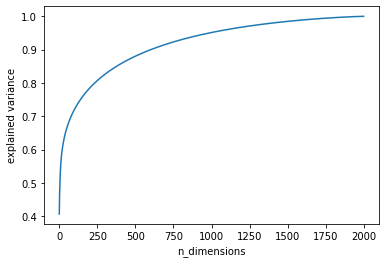

In [ ]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.ylabel('explained variance')
plt.xlabel('n_dimensions')

Text(0.5, 0, 'n_dimensions')

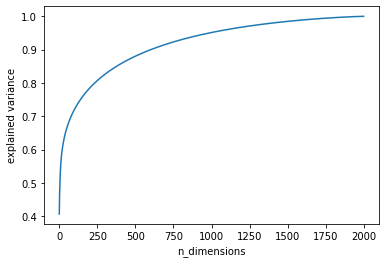

In [ ]:
plt.plot(ipca.explained_variance_ratio_.cumsum())
plt.ylabel('explained variance')
plt.xlabel('n_dimensions')

they appear to have very similiar graphs so I do not really know which version preformed better. It did seem like the IPCA version took longer to run however